# Entrenando modelos lineales

## Regresión lineal

$$ \hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

Para predecir un valor computamos la siguiente ecuación.

$$ \hat{y}=h_\theta(\bf{x}) = \mathbf {\theta}\cdot{x} $$

El ajuste se hace reduciendo el *Mean Square Error* o MSE dado por,

$$ MSE(\mathbf {X},h_\mathbf {\theta}) = \frac{1}{m}\sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} \Big( \mathbf {\theta^T}\bf{x^{(i)}- y^{(i)}}  \Big)^2$$

Para encontar el valor de $\mathbf{\theta}$ que minimice la ecuacion de costo se utiliza una ecuación llamada *Normal Equation* dada por,

$$ \mathbf{\hat{\theta}} = \big( \mathbf{X^T\mathbf{X}} \big)^{-1} \mathbf{X^T}\mathbf{y}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = 2*np.random.rand(100,1)
y = 3 + 2*X + np.random.randn(100,1)

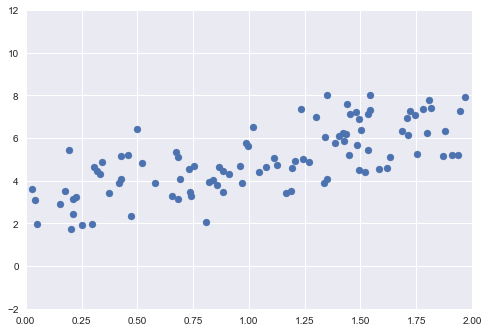

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots()

ax.set_xlim(0,2.)
ax.set_ylim(-2,12)
ax.scatter(X,y)
plt.show()

Ahora vamos a aplicar resolver la *normal equiation*.

In [22]:
X_b = np.c_[np.ones((100,1)),X]
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [23]:
theta_hat

array([[2.8892629 ],
       [2.00062946]])

Los valores hayados se acercan bastante los valores iniciales de la recta usada para generar los puntos, podemos ver que $\theta_0 = 2.9$ y $\theta_1 = 2.0$.

Ahora podemos usar este $\hat\theta$ para predecir valores.

In [29]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_hat)
y_pred

array([[2.8892629 ],
       [6.89052182]])

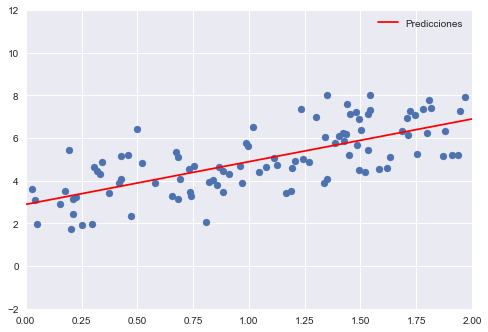

In [37]:
fig, ax = plt.subplots()

ax.plot(X_new, y_pred, "r-", label = "Predicciones")
ax.scatter(X,y)
plt.axis([0,2,-2,12])

plt.legend()
plt.show()

Ahora vamos a implementar un regresor lineal pero usando Scikit Learn.

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(X,y)
lr.intercept_, lr.coef_

(array([2.8892629]), array([[2.00062946]]))

In [41]:
lr.predict(X_new)

array([[2.8892629 ],
       [6.89052182]])

La clase *LinearREgression* esta basada en la función *scipy.linalg.lstsq()*, que hace referencia a "*least squares*", la cual puede ser llamada directamente.

In [43]:
theta_hat2, residuo, rango, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_hat2

array([[2.8892629 ],
       [2.00062946]])

La función *scipy.linalg.lstsq()* computa $\mathbf{\hat\theta} = \mathbf{X}^{+}\mathbf{y}$ donde $\mathbf{X}^+$ es ka matríz *pseudoinversa* de $\mathbf{X}$. Éste método es más eficiente y además dicha matriz siempre esta definida, mientras que para la *normal equiation* podríamos no tener solución.

## Regresión por polinómios

¿Qué hacemos en los casos en donde tenemos datos que poseen una distribución diferente a la lineal?

Un forma simple es agregar *potencias* a cada característica dentro de nuestros datos y agregarlas como nuevas características y luego entrenamos un *modelo lineal* sobre este nuevo set de datos. Debemos notar que **sigue siendo un modelo lineal, pero con características nuevas**. 

Veamos un ejemplo.

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

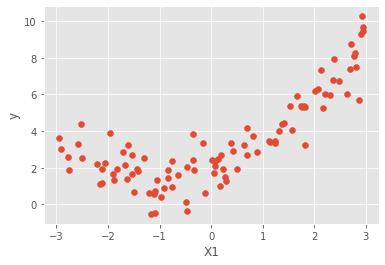

In [28]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
ax.set_xlabel("X1")
ax.set_ylabel("y")
ax.scatter(X,y)

plt.show()

Utilizaremos la clase [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para transformar nuestros datos antes de ajustar el modelo lineal.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

print(X[0])

print(X_poly[0])

[-2.90455627]
[-2.90455627  8.4364471 ]


Ahora vamos a entrenar el regresor lineal.

In [30]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()

lr2.fit(X_poly,y)

lr2.intercept_, lr2.coef_

(array([1.91028105]), array([[0.93475741, 0.47917284]]))

Generamos nuevos datos y vemos que tan bien ajusta el modelo.

In [44]:
m = 100
X_new = np.linspace(-3,3, m).reshape(m,1)

X_new_poly = poly_features.fit_transform(X_new)

In [45]:
y_pred = lr2.predict(X_new_poly)
y_pred[:5]

array([[3.41856443],
       [3.30273177],
       [3.19041921],
       [3.08162674],
       [2.97635436]])

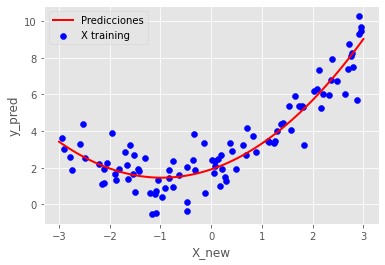

In [53]:
fig, ax = plt.subplots()

ax.plot(X_new, y_pred, "r", label = "Predicciones", linewidth = 2)
ax.set_xlabel("X_new")
ax.set_ylabel("y_pred")

ax.scatter(X,y, color="b", label = "X training")

plt.legend()
plt.show()

In [56]:
lr2.intercept_,lr2.coef_

(array([1.91028105]), array([[0.93475741, 0.47917284]]))

Considerando que la función original era $y = 0.5 * X^2 + X + 2 + Ruido_{Gaussiano}$ la función encontrada por *LinearRegression* no esta tan mal.

## Curvas de aprendizaje

Sabemos que el modelo funciona bien sobre los datos de entrenamiento pero generaliza pobremente de acuerdo a las métricas dadas por el método de *cross-validation* podemos decir que nuestro modelo posee *overfitting*. Por el contrario, si funciona mal sobre los datos de entrenamiento y también sobre los de validación, podemos decir que el modelo posee *underfitting*.

Esto es una medida buena para saber que tan "complejo" o "simple" es nuestro modelo.

Recordemos que queremos generalizar y no ajustar los datos a la perfección.

Una forma alternativa de corroborar o inferir en la complejidad de nuestro modelo para ver el grado de generalización del mismo es utilizara *curvas de aprendizaje*. Estas son gráficas de la performance del modelo sobre los datos de entrenamiento y el de validación como una función del set de entrenamiento (o de la iteración de entrenamiento). Para generar estas curvas lo que se hace es entrenar el modelo varias veces con diferentes tamaños de subsets del set de entrenamiento. 

Veamos el ejemplo siguiente en donde estudiaremos las curvas de *learning curves* para le modelo lineal sobre los datos cuadráticos.

In [123]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from matplotlib.lines import Line2D

def plotLearningCurves(model, X, y, figsize = (10,5), title = "Curvas aprendizaje"):
    
    cmap = plt.cm.coolwarm
    customLines = [Line2D([0], [0], color="r", lw=4),
                    Line2D([0], [0], color="b", lw=4)]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    trainErrors, valErrors = [], []
    
    plt.subplots(figsize = figsize)
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) #entrenamos el modelo
        yTrain_pred = model.predict(X_train[:m]) #predecimos
        yVal_pred = model.predict(X_val)
        trainErrors.append(mse(y_train[:m], yTrain_pred))
        valErrors.append(mse(y_val, yVal_pred))
        plt.plot(np.sqrt(trainErrors), "r-", linewidth=2)
        plt.plot(np.sqrt(valErrors), "b-", linewidth=2)
        
    plt.title(title)
    plt.legend(customLines, ['Entrenamiento', 'Validación'])
#     plt.show()

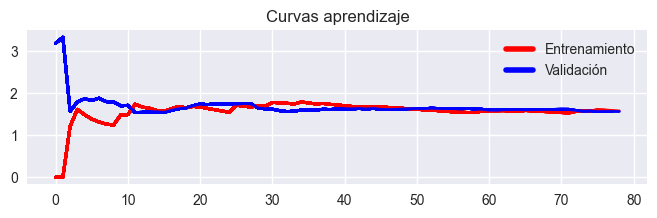

In [114]:
ejemplo_LR = LinearRegression()
plt.style.use("seaborn")
plotLearningCurves(ejemplo_LR, X,y, figsize = (8,2))

Cuando tenemos una o dos instancias (*m*) como subset de entrenamiento, el modelo puede ajustar perfectamente, por ende, el MSE empieza en cero. No obstante, a medida que agregamos más y más instancias al subset de entrenamiento, el modelo no puede ajustar bien. Esto se debe a que tenemos un set de datos no lineal y que además posee ruido gaussiano. Notamos también que alcanza una *meseta*, la misma se debe a que aún agregando más instancias, el modelo no mejora ni empeora.

Ahora bien, en el caso del set de validación cuando tenemos una o dos instancias el modelo es incapaz de ajustar apropiadamante, por lo tanto tenemos un alto mse. A medida que agregamos instancias el modelo comienza a aprender hasta finalmente encontrar una meseta que se acerca mucho a la curva de aprendizaje sobre los subsets de entrenamiento, la cual se genera por los mismos motivos vistos anteriormente.

**Nota:** Si el modelo posee *underfitting* no va a mejorar si agregamos mas cantidad de subsets de entrenamiento, es decir, tomando datos del mismo set de entrenamiento. En este caso deberemos aumentar la complejidad del modelo.

Analicemos ahora lo que sucede con las curvas de aprendizaje para un polinimo grado 15.

In [144]:
from sklearn.pipeline import Pipeline

polyRegPipeline = Pipeline([
                    ("polyFeatures", PolynomialFeatures(degree = 15, include_bias = False)),
                    ("modeloLR", LinearRegression())])
# polyRegPipeline

(0.0, 50.0, 0.0, 5.0)

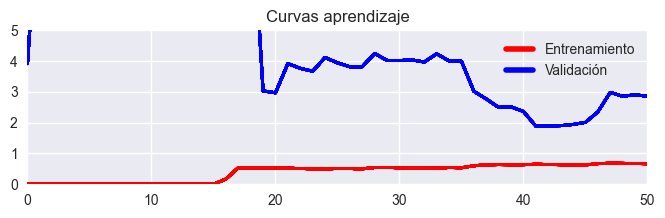

In [145]:
plotLearningCurves(polyRegPipeline, X, y, figsize = (8,2))
plt.axis([0, 50, 0, 5])

Ahora podemos ver que el modelo ajusta perfectamente los datos de entrenamiento pero lo hace muy mal en los datos de validación. Esto es un claro ejemplo de *overfitting*.

Ahora hagamos lo mismo para un polinimo grado 2.

In [142]:
from sklearn.pipeline import Pipeline

polyRegPipeline = Pipeline([
                    ("polyFeatures", PolynomialFeatures(degree = 2, include_bias = False)),
                    ("modeloLR", LinearRegression())])
# polyRegPipeline

(0.0, 50.0, 0.0, 2.0)

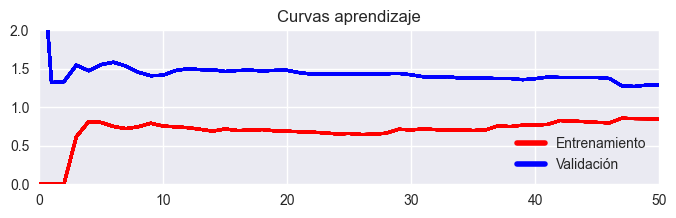

In [143]:
plotLearningCurves(polyRegPipeline, X, y, figsize = (8,2))
plt.axis([0, 50, 0, 2])

**Nota:** Una forma de mejorar el modelo para prevenir overfitting es utilizar más cantidad de datos en el subset de entrenamiento hasta que el set de validación alcance el error de entrenamiento.

### Bias/Variance *trade-off*

Un resultado importante en ML acerca del error de generalización de un modelo es que es el resultado de tres factores.

- BIAS: Esta parte del error de generalización se debe a errores en el análisis de los datos, tales como creer que los datos son lineales cuando no lo son. Un bias elevado tiende a generar underfitting sobre los datos de entrenamiento.

- Varianza: La varianza se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en el set de entrenamiento. Un modelo con muchos grados de libertad (como un polinomio de grado alto) es probable que tenga una gran varianza y así produzco un overfitting sobre los datos de entrenamiento.

- Error *irreductible*: Esta parte se corresponde con el *ruido* propio de los datos. Para mejorarlo lo que se puede hacer es trabajar sobre los datos, limpiándolos, arreglando la fuente de los datos (como podrían ser sensores), eliminando *outliers*, etc.

Ahora bien, cuando incrementamos la complejidad del modelo incrementamos la varianza y disminuimos el bias, y a la inversa. Por lo tanto, cuando aumentamos uno, disminuímos el otro, de ahí el nombre de *Bias/Variance trade-off*.